In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

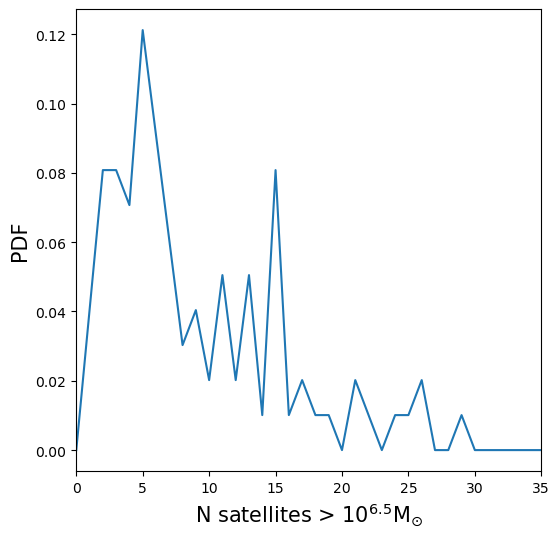

In [3]:
data = jsm_models.LOAD_DATA("../../mcmc/inference_tests/our_stats/s30_data/mock_2_1/mock_data.npz")
data.get_stats(min_mass=6.5, max_N=700)
data.stat.Pnsat_plot()

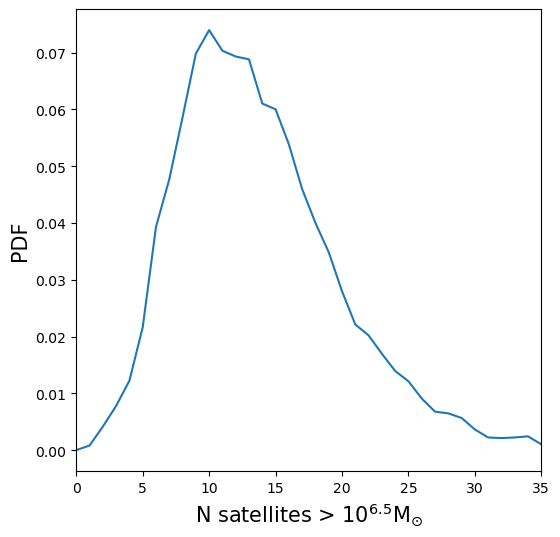

In [4]:
models = jsm_models.LOAD_MODELS("../../mcmc/inference_tests/our_stats/s30_data/mock_2_1/remaining_models.npz")

models.get_stats(theta=[10.5, 1.81, 0.0, 0.0, 0.57, 0.0], min_mass=6.5, max_N=700, Nsigma_samples=1)
models.stat.Pnsat_plot()

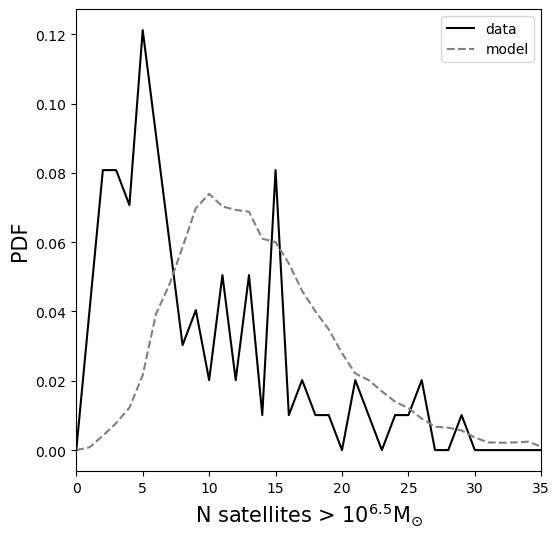

In [5]:
plt.figure(figsize=(6,6))
plt.plot(data.stat.PNsat_range, data.stat.PNsat, color="black", label="data")
plt.plot(models.stat.PNsat_range, models.stat.PNsat, color="grey", ls="--", label="model")
plt.xlabel("N satellites > $10^{"+str(data.stat.min_mass)+"} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.legend()
plt.xlim(0,35)
plt.show()

In [6]:
lnL_Pnsat = jsm_stats.lnL_PNsat(data, models)
lnL_KS_max = jsm_stats.lnL_KS_max(data, models)

print(lnL_Pnsat, lnL_KS_max)

-inf -10.431887261632482


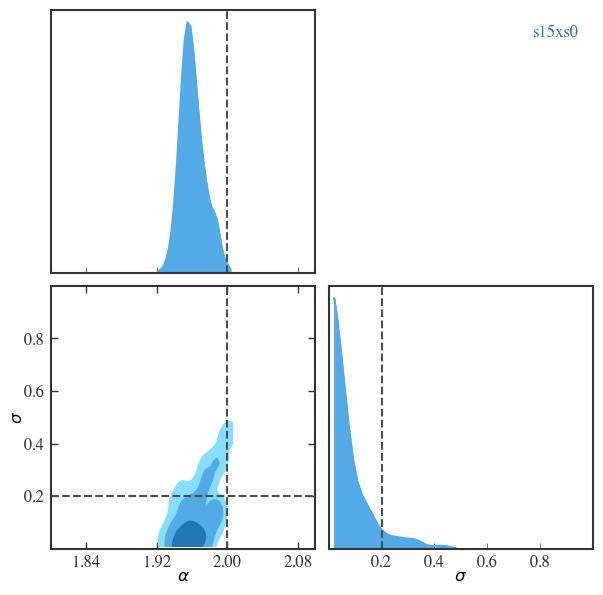

In [35]:
fixed = [False, True, False, False, True, False]
fid_values = [2.0, 0.2]

s_1_0_nadler = jsm_mcmc.Chain("../../../data/remote_pull/mock_1_0/chain.h5", fixed=fixed, Nstack=500, Nburn=3500, Nthin=25)

s_1_0_nadler.plot_posteriors(paper=True, nContourLevels=3, truths=fid_values, smoothingKernel=1.5, paramRanges=[[1.8, 2.1], [0,1.0]], chainLabels="s15xs0")

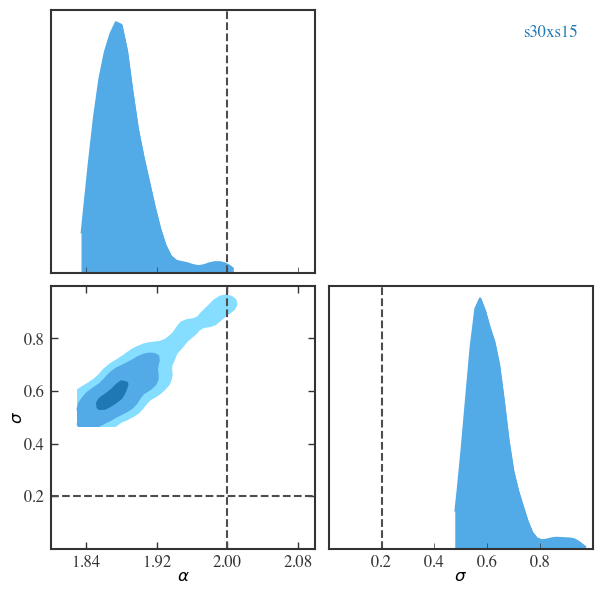

In [36]:
fixed = [False, True, False, False, True, False]
fid_values = [2.0, 0.2]

s_1_0_nadler = jsm_mcmc.Chain("../../../data/remote_pull/mock_2_1/chain.h5", fixed=fixed, Nstack=500, Nburn=6500, Nthin=25)

s_1_0_nadler.plot_posteriors(paper=True, nContourLevels=3, truths=fid_values, smoothingKernel=1.5, paramRanges=[[1.8, 2.1], [0,1.0]], chainLabels="s30xs15")

## NADLER visualization

In [ ]:
data.get_NADLER_stats(min_mass=6.5, max_mass=11.5, N_bin=31)
data.stat.SMF_plot()

In [ ]:
models.get_NADLER_stats(data.fid_theta, min_mass=6.5, max_mass=11.5, N_bin=31)
models.stat.SMF_plot()

In [ ]:
plt.figure(figsize=(6,6))
for stack in models.stat.stack_mat:
    plt.step(models.stat.bin_centers, stack, color="grey", alpha=0.2, ls="--", where="mid")
plt.step(data.stat.bin_centers, data.stat.stack, color="black", where="mid", lw=3)
plt.xlabel("stellar mass")
plt.ylabel("stacked N")
plt.yscale("log")
plt.ylim(0, 220)
plt.show() 

In [ ]:
plt.figure(figsize=(6,6))
for stack in models.stat.stack_mat:
    plt.step(models.stat.bin_centers, stack, color="grey", alpha=0.2, ls="--", where="mid")
plt.step(data.stat.bin_centers, data.stat.stack, color="black", where="mid", lw=3)
plt.xlabel("stellar mass")
plt.ylabel("stacked N")
plt.yscale("log")
plt.ylim(0, 220)
plt.show() 

In [ ]:
plt.figure(figsize=(6,6))
for stack in models.stat.stack_mat:
    plt.step(models.stat.bin_centers, stack, color="grey", alpha=0.2, ls="--", where="mid")
plt.step(data.stat.bin_centers, data.stat.stack, color="black", where="mid", lw=3)
plt.xlabel("stellar mass")
plt.ylabel("stacked N")
plt.yscale("log")
plt.ylim(0, 220)
plt.show() 

In [ ]:
models0 = jsm_models.LOAD_MODELS("../../../data/remote_pull/inference_tests/nadler_stats/s30_data/mock_2_0/remaining_models.npz")
models.get_NADLER_stats(data.fid_theta, min_mass=6.5, max_mass=10.5, N_bin=31)
models.stat.SMF_plot()

In [ ]:
models0 = jsm_models.LOAD_MODELS("../../../data/remote_pull/inference_tests/nadler_stats/s30_data/mock_2_1/remaining_models.npz")
models.get_NADLER_stats(data.fid_theta, min_mass=6.5, max_mass=10.5, N_bin=31)
models.stat.SMF_plot()

In [ ]:
models0 = jsm_models.LOAD_MODELS("../../../data/remote_pull/inference_tests/nadler_stats/s30_data/mock_2_2/remaining_models.npz")
models.get_NADLER_stats(data.fid_theta, min_mass=6.5, max_mass=10.5, N_bin=31)
models.stat.SMF_plot()